In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Sunspots.csv',index_col=0)

In [3]:
data.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [4]:
data['time_steps'] = range(0,len(data['Date']))

In [5]:
sunspots = [float(i) for i in data['Monthly Mean Total Sunspot Number']]
time_step = [int(i) for i in data['time_steps']]

In [6]:
series = np.array(sunspots)
time = np.array(time_step)

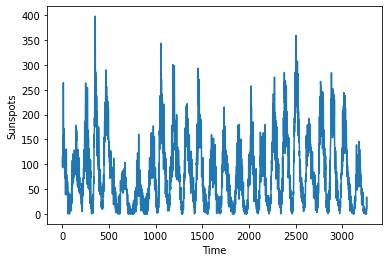

In [7]:
plt.plot(time,series)
plt.xlabel('Time')
plt.ylabel('Sunspots')
plt.show()

In [8]:
split_time = 2500
window_size = 60
batch_size = 250


x_train = series[:split_time]
time_train = time[:split_time]
x_test = series[split_time:]
time_test = time[split_time:]

In [9]:
def create_windows(series,window_size,batch_size,shuffle_buffer):
    series = np.expand_dims(series, axis=1)   #reshaped only for conv1d
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(size=window_size+1,shift=1,drop_remainder=True)
    dataset = dataset.flat_map(lambda window : window.batch(window_size+1))
    dataset = dataset.shuffle(buffer_size=shuffle_buffer).map(lambda window : (window[:-1],window[-1:]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [10]:
windowed_xTrain = create_windows(x_train,window_size,batch_size,split_time)
windowed_xTest = create_windows(x_test,window_size,batch_size,split_time)

In [11]:
class mycallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs['loss'] < 15:
            model.stop_training = True
            print('\nEnding training squence because the loss threshold has been reached')
calls = mycallbacks()
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-8 * 10 ** (epoch / 20))

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=100,kernel_size=5,padding='causal',strides=1,activation='relu',input_shape=[window_size,1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100,return_sequences=True)),
    tf.keras.layers.Dense(75,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x : x * 400)
])

In [13]:
model.compile(loss=tf.keras.losses.Huber(),optimizer=tf.keras.optimizers.SGD(learning_rate=1e-8,momentum=0.9))

In [14]:
history = model.fit(windowed_xTrain,epochs=100,verbose=0,callbacks=[lr_scheduler])

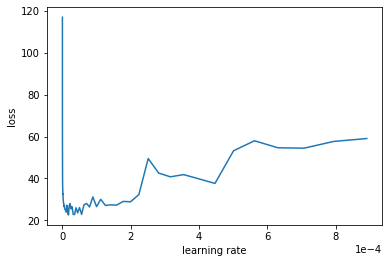

In [15]:
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
loss = history.history['loss']

plt.plot(lrs,loss)
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.ticklabel_format(axis='x', style='sci',scilimits=(1e-8,1e-3))
plt.show()

In [16]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=100,kernel_size=5,padding='causal',strides=1,activation='relu',input_shape=[window_size,1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100,return_sequences=True)),
    tf.keras.layers.Dense(75,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x : x * 400)
])

In [17]:
model.compile(loss=tf.keras.losses.Huber(),optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4,momentum=0.9))
history = model.fit(windowed_xTrain,epochs=500,verbose=1,callbacks=[calls])

Epoch 1/500
10/10 [==============================] - 7s 59ms/step - loss: 54.4391
Epoch 2/500
10/10 [==============================] - 1s 57ms/step - loss: 48.0631
Epoch 3/500
10/10 [==============================] - 1s 57ms/step - loss: 39.4020
Epoch 4/500
10/10 [==============================] - 1s 57ms/step - loss: 35.3705
Epoch 5/500
10/10 [==============================] - 1s 57ms/step - loss: 35.9400
Epoch 6/500
10/10 [==============================] - 1s 58ms/step - loss: 33.1561
Epoch 7/500
10/10 [==============================] - 1s 57ms/step - loss: 31.8527
Epoch 8/500
10/10 [==============================] - 1s 58ms/step - loss: 29.7629
Epoch 9/500
10/10 [==============================] - 1s 57ms/step - loss: 30.0969
Epoch 10/500
10/10 [==============================] - 1s 57ms/step - loss: 33.5849
Epoch 11/500
10/10 [==============================] - 1s 56ms/step - loss: 40.6977
Epoch 12/500
10/10 [==============================] - 1s 56ms/step - loss: 34.2705
Epoch 13/500


10/10 [==============================] - 1s 56ms/step - loss: 17.8138
Epoch 100/500
10/10 [==============================] - 1s 55ms/step - loss: 16.7263
Epoch 101/500
10/10 [==============================] - 1s 54ms/step - loss: 16.7678
Epoch 102/500
10/10 [==============================] - 1s 55ms/step - loss: 16.1434
Epoch 103/500
10/10 [==============================] - 1s 55ms/step - loss: 16.8499
Epoch 104/500
10/10 [==============================] - 1s 55ms/step - loss: 16.8811
Epoch 105/500
10/10 [==============================] - 1s 55ms/step - loss: 16.7285
Epoch 106/500
10/10 [==============================] - 1s 55ms/step - loss: 16.6953
Epoch 107/500
10/10 [==============================] - 1s 55ms/step - loss: 15.8598
Epoch 108/500
10/10 [==============================] - 1s 55ms/step - loss: 16.2386
Epoch 109/500
10/10 [==============================] - 1s 55ms/step - loss: 16.7028
Epoch 110/500
10/10 [==============================] - 1s 55ms/step - loss: 16.2871
Epoch 

10/10 [==============================] - 1s 56ms/step - loss: 15.6848
Epoch 197/500
10/10 [==============================] - 1s 55ms/step - loss: 15.2985
Epoch 198/500
10/10 [==============================] - 1s 56ms/step - loss: 15.4644
Epoch 199/500
10/10 [==============================] - 1s 56ms/step - loss: 15.9612
Epoch 200/500
10/10 [==============================] - 1s 55ms/step - loss: 15.6751
Epoch 201/500
10/10 [==============================] - 1s 56ms/step - loss: 15.4672
Epoch 202/500
10/10 [==============================] - 1s 55ms/step - loss: 15.1498
Epoch 203/500
10/10 [==============================] - 1s 55ms/step - loss: 15.7217
Epoch 204/500
10/10 [==============================] - 1s 56ms/step - loss: 15.3321
Epoch 205/500
10/10 [==============================] - 1s 56ms/step - loss: 15.2347
Epoch 206/500
10/10 [==============================] - 1s 56ms/step - loss: 17.1743
Epoch 207/500
10/10 [==============================] - 1s 55ms/step - loss: 15.6687
Epoch 

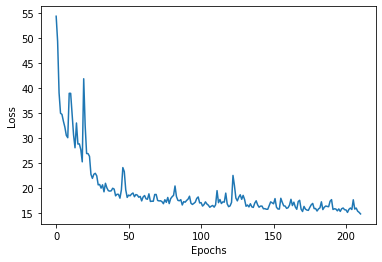

In [18]:
loss = history.history['loss']
total_epochs = len(loss)
epochs = range(total_epochs)

plt.plot(epochs,loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()